数据特征如下：

**Attribute** | **Definition**
--- | ---
编号 | 标识个体身份的数字
性别 | 1表示男性，0表示女性
出生年份| 出生年份
体重指数 | (体重)/(身高的平方),kg/m^2
糖尿病家族史 | 标识糖尿病的遗传特性，记录家族里面患有糖尿病的家属，分成三种标识，分别是父母有一方患有糖尿病、叔叔或者姑姑有一方患有糖尿病、无记录
舒张压 | 心脏舒张时，动脉血管弹性回缩时，产生的压力称为舒张压，单位mmHg
口服耐糖量测试 | 诊断糖尿病的一种实验室检查方法，采用120分钟耐糖测试后的血糖值，单位mmol/L
胰岛素释放实验 | 空腹时定量口服葡萄糖刺激胰岛β细胞释放胰岛素，采用服糖后120分钟的血浆胰岛素水平，单位pmol/L
肱三头肌皮褶厚度 | 在右上臂后面肩峰与鹰嘴连线的重点处，夹取与上肢长轴平行的皮褶，纵向测量，单位mm
患有糖尿病标识 | 1表示患有糖尿病，0表示未患有糖尿病

In [1]:
import pandas as pd
# 导入训练数据集及测试数据集
train_data = pd.read_csv('E:/DocumentFile/data/糖尿病遗传风险预测挑战赛公开数据/比赛训练集.csv')
test_data = pd.read_csv('E:/DocumentFile/data/糖尿病遗传风险预测挑战赛公开数据/糖尿病遗传风险预测挑战赛b榜新数据集.csv')
print("训练数据集：", train_data.shape, "测试数据集", test_data.shape)

训练数据集： (5070, 10) 测试数据集 (4000, 9)


In [2]:
# 查看训练数据
train_data.head()

,编号,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识
0,1,0,1996,30.1,无记录,106.0,3.818,7.89,0.0,0
1,2,0,1988,27.5,无记录,84.0,-1.000,0.00,14.7,0
2,3,1,1988,36.5,无记录,85.0,7.131,0.00,40.1,1
3,4,1,1992,29.5,无记录,91.0,7.041,0.00,0.0,0
4,5,0,1998,42.0,叔叔或者姑姑有一方患有糖尿病,NaN,7.134,0.00,0.0,1


In [3]:
# 浏览数据的基本信息
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   编号        5070 non-null   int64  
 1   性别        5070 non-null   int64  
 2   出生年份      5070 non-null   int64  
 3   体重指数      5070 non-null   float64
 4   糖尿病家族史    5070 non-null   object 
 5   舒张压       4823 non-null   float64
 6   口服耐糖量测试   5070 non-null   float64
 7   胰岛素释放实验   5070 non-null   float64
 8   肱三头肌皮褶厚度  5070 non-null   float64
 9   患有糖尿病标识   5070 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 396.2+ KB


In [4]:
# 查看数据的基本统计信息
train_data.describe()

,编号,性别,出生年份,体重指数,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识
count,5070.000000,5070.000000,5070.000000,5070.000000,4823.000000,5070.000000,5070.000000,5070.000000,5070.000000
mean,2535.500000,0.456805,1986.869231,37.986785,89.423595,5.612839,4.114321,6.994371,0.381854
std,1463.727263,0.498180,8.919737,11.447095,9.266992,2.257649,8.726001,13.651442,0.485889
min,1.000000,0.000000,1943.000000,0.000000,30.000000,-1.000000,0.000000,0.000000,0.000000
25%,1268.250000,0.000000,1980.000000,28.400000,85.000000,4.314000,0.000000,0.000000,0.000000
50%,2535.500000,0.000000,1987.000000,36.550000,89.000000,5.760000,0.000000,0.000000,0.000000
75%,3802.750000,1.000000,1995.000000,47.600000,96.000000,7.193000,7.100000,4.120000,1.000000
max,5070.000000,1.000000,2009.000000,65.900000,126.000000,10.839000,108.960000,45.000000,1.000000


In [5]:
# 统计一下患和不患糖尿病的人数
patient_num = train_data['患有糖尿病标识'].sum()
nonpatient_num = train_data['患有糖尿病标识'].count() - patient_num
print('患糖尿病的人数:：%d人, 不患糖尿病的人数：%d人' % (patient_num, nonpatient_num))

患糖尿病的人数:：1936人, 不患糖尿病的人数：3134人


In [6]:
# 分析性别与是否患糖尿病的关系
Sex_Patient = pd.concat([train_data['患有糖尿病标识'], train_data['性别']], axis=1)
print(Sex_Patient.value_counts())

患有糖尿病标识  性别
0        0     1741
         1     1393
1        0     1013
         1      923
dtype: int64


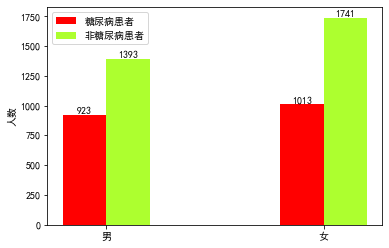

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.rcParams['font.family'] = ['SimHei']
x = ['男', '女']
y1 = [923, 1013]
y2 = [1393, 1741]
plt.bar(range(2), y1, width=0.2, facecolor='red', label='糖尿病患者')
plt.bar([i+0.2 for i in range(2)], y2, width=0.2, facecolor='greenyellow', label='非糖尿病患者')
plt.xticks([i+0.1 for i in range(2)], x)
for a, b in zip(range(2), y1):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
for a, b in zip([i+0.2 for i in range(2)], y2):
    plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.ylabel('人数')
plt.legend()
plt.show()

**由此可见，在5070例样本中，男性共2316人，女性共2754人；男性患者923人，占男性比例约为40%；女性患者1013人，占女性比例约为37%。**

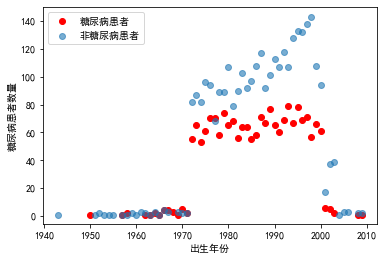

In [8]:
# 分析出生年份与是否患糖尿病的关系
Birth_Patient = pd.concat([train_data['患有糖尿病标识'], train_data['出生年份']],axis=1)
Birth_OnPatient = Birth_Patient[Birth_Patient['患有糖尿病标识'] == 1]['出生年份'].value_counts()
Birth_NonPatient = Birth_Patient[Birth_Patient['患有糖尿病标识'] == 0]['出生年份'].value_counts()
x1 = Birth_OnPatient.index
y1 = Birth_OnPatient.values
x2 = Birth_NonPatient.index
y2 = Birth_NonPatient.values
plt.scatter(x1, y1, c='r', label='糖尿病患者')
plt.scatter(x2, y2, alpha=0.6, label='非糖尿病患者')
plt.xlabel('出生年份')
plt.ylabel('糖尿病患者数量')
plt.legend()
plt.show()

**由此可见，糖尿病多发人群为中老年人**

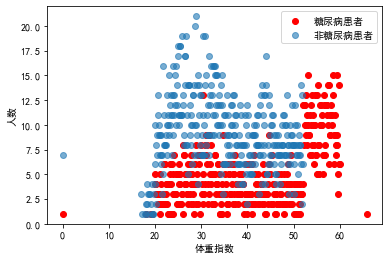

In [9]:
# 分析体重指数与是否患糖尿病的关系
Weight_Patient = pd.concat([train_data['患有糖尿病标识'], train_data['体重指数']], axis=1)
Weight_OnPatient = Weight_Patient[Weight_Patient['患有糖尿病标识'] == 1]['体重指数'].value_counts()
Weight_NonPatient = Weight_Patient[Weight_Patient['患有糖尿病标识'] == 0]['体重指数'].value_counts()
x1 = Weight_OnPatient.index
y1 = Weight_OnPatient.values
x2 = Weight_NonPatient.index
y2 = Weight_NonPatient.values
plt.figure()
plt.scatter(x1, y1, c='r', label='糖尿病患者')
plt.scatter(x2, y2, alpha=0.6, label='非糖尿病患者')
plt.xlabel('体重指数')
plt.ylabel('人数')
plt.legend()
plt.show()

**由此可见，体重指数越高，越容易患糖尿病**

In [10]:
# 分析糖尿病家族史与是否患糖尿病的关系
Family_Patient = pd.concat([train_data['患有糖尿病标识'], train_data['糖尿病家族史']], axis=1)
Family_Patient = Family_Patient.replace('叔叔或者姑姑有一方患有糖尿病', '叔叔或姑姑有一方患有糖尿病')
Family_OnPatient = Family_Patient[Family_Patient['患有糖尿病标识'] == 1]['糖尿病家族史'].value_counts()
Family_OnPatient

无记录              1101
叔叔或姑姑有一方患有糖尿病     495
父母有一方患有糖尿病        340
Name: 糖尿病家族史, dtype: int64

In [11]:
Family_NonPatient = Family_Patient[Family_Patient['患有糖尿病标识'] == 0]['糖尿病家族史'].value_counts()
Family_NonPatient

无记录              1796
叔叔或姑姑有一方患有糖尿病     803
父母有一方患有糖尿病        535
Name: 糖尿病家族史, dtype: int64

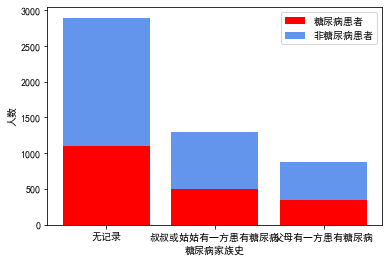

In [12]:
import numpy as np
x = ['无记录', '叔叔或姑姑有一方患有糖尿病', '父母有一方患有糖尿病']
y1 = [1101, 495, 340]
y2 = [1796, 803, 535]
plt.figure()
plt.bar(np.arange(len(x)), y1, facecolor='red', label='糖尿病患者')
plt.bar(np.arange(len(x)), y2, facecolor='cornflowerblue', bottom=y1, label='非糖尿病患者')
plt.xticks([i for i in np.arange(len(x))], x)
plt.xlabel('糖尿病家族史')
plt.ylabel('人数')
plt.legend()
plt.show()

**由此可见，有糖尿病家族史的人患病的比例更高**

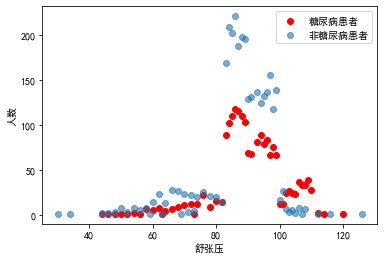

In [13]:
# 分析舒张压与是否患糖尿病的关系
Pressure_Patient = pd.concat([train_data['患有糖尿病标识'], train_data['舒张压']], axis=1)
Pressure_OnPatient = Pressure_Patient[Pressure_Patient['患有糖尿病标识'] == 1]['舒张压'].value_counts()
Pressure_NonPatient = Pressure_Patient[Pressure_Patient['患有糖尿病标识'] == 0]['舒张压'].value_counts()
x1 = Pressure_OnPatient.index
y1 = Pressure_OnPatient.values
x2 = Pressure_NonPatient.index
y2 = Pressure_NonPatient.values
plt.figure()
plt.scatter(x1, y1, c='r', label='糖尿病患者')
plt.scatter(x2, y2, alpha=0.6, label='非糖尿病患者')
plt.xlabel('舒张压')
plt.ylabel('人数')
plt.legend()
plt.show()

**由此可见，舒张压越高，患糖尿病人数越多**

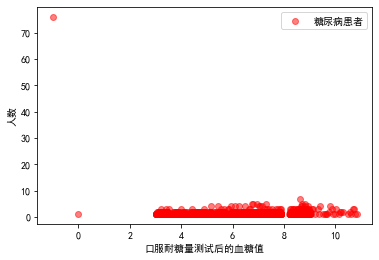

In [14]:
# 分析口服耐糖量测试与是否患糖尿病的关系
Sugar_Patient = pd.concat([train_data['患有糖尿病标识'], train_data['口服耐糖量测试']], axis=1)
Sugar_OnPatient = Sugar_Patient[Sugar_Patient['患有糖尿病标识'] == 1]['口服耐糖量测试'].value_counts()
Sugar_NonPatient = Sugar_Patient[Sugar_Patient['患有糖尿病标识'] == 0]['口服耐糖量测试'].value_counts()
x1 = Sugar_OnPatient.index
y1 = Sugar_OnPatient.values
x2 = Sugar_NonPatient.index
y2 = Sugar_NonPatient.values
plt.figure()
plt.scatter(x1, y1, c='r', alpha=0.5, label='糖尿病患者')
plt.xlabel('口服耐糖量测试后的血糖值')
plt.ylabel('人数')
plt.legend()
plt.show()

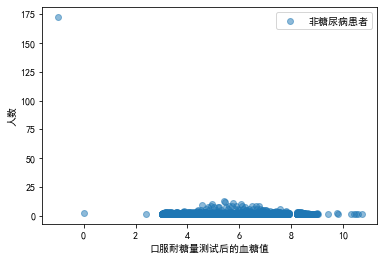

In [15]:
plt.scatter(x2, y2, alpha=0.5, label='非糖尿病患者')
plt.xlabel('口服耐糖量测试后的血糖值')
plt.ylabel('人数')
plt.legend()

**由此可见，当血糖值>8时，患糖尿病患者明显多于非糖尿病患者。并且<=0的都为异常值**

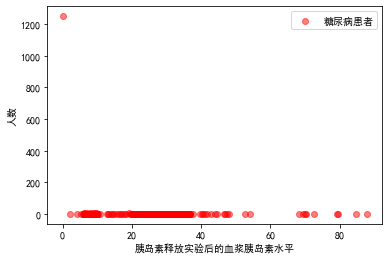

In [16]:
# 分析胰岛素释放实验与是否患糖尿病的关系
Insulin_Patient = pd.concat([train_data['患有糖尿病标识'], train_data['胰岛素释放实验']], axis=1)
Insulin_OnPatient = Insulin_Patient[Insulin_Patient['患有糖尿病标识'] == 1]['胰岛素释放实验'].value_counts()
Insulin_NonPatient = Insulin_Patient[Insulin_Patient['患有糖尿病标识'] == 0]['胰岛素释放实验'].value_counts()
x1 = Insulin_OnPatient.index
y1 = Insulin_OnPatient.values
x2 = Insulin_NonPatient.index
y2 = Insulin_NonPatient.values
plt.figure()
plt.scatter(x1, y1, c='r', alpha=0.5, label='糖尿病患者')
plt.xlabel('胰岛素释放实验后的血浆胰岛素水平')
plt.ylabel('人数')
plt.legend()
plt.show()

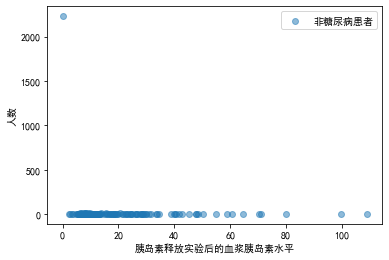

In [17]:
plt.scatter(x2, y2, alpha=0.5, label='非糖尿病患者')
plt.xlabel('胰岛素释放实验后的血浆胰岛素水平')
plt.ylabel('人数')
plt.legend()

**对比可知，两者没有明显的差距，并且为0的数据过多，这属于异常数据**

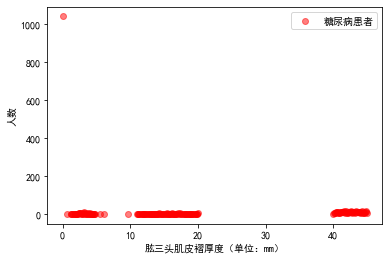

In [18]:
# 分析肱三头肌皮褶厚度与是否患糖尿病的关系
Skinfold_Patient = pd.concat([train_data['患有糖尿病标识'], train_data['肱三头肌皮褶厚度']], axis=1)
Skinfold_OnPatient = Skinfold_Patient[Skinfold_Patient['患有糖尿病标识'] == 1]['肱三头肌皮褶厚度'].value_counts()
Skinfold_NonPatient = Skinfold_Patient[Skinfold_Patient['患有糖尿病标识'] == 0]['肱三头肌皮褶厚度'].value_counts()
x1 = Skinfold_OnPatient.index
y1 = Skinfold_OnPatient.values
x2 = Skinfold_NonPatient.index
y2 = Skinfold_NonPatient.values
plt.figure()
plt.scatter(x1, y1, c='r', alpha=0.5, label='糖尿病患者')
plt.xlabel('肱三头肌皮褶厚度（单位：mm）')
plt.ylabel('人数')
plt.legend()
plt.show()

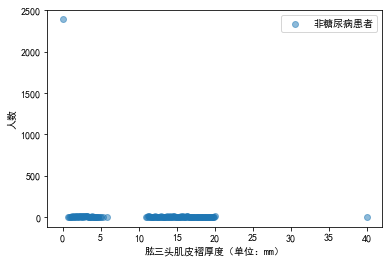

In [19]:
plt.scatter(x2, y2, alpha=0.5, label='非糖尿病患者')
plt.xlabel('肱三头肌皮褶厚度（单位：mm）')
plt.ylabel('人数')
plt.legend()

**由此可见，当肱三头肌皮褶厚度>40时，糖尿病患者明显大于非糖尿病患者，0的数据过多，属于异常数据**

In [20]:
# 关系矩阵
corr_df = train_data.corr()
print(corr_df['患有糖尿病标识'].sort_values())

出生年份       -0.068225
编号          0.027435
性别          0.031480
胰岛素释放实验     0.156656
舒张压         0.157421
口服耐糖量测试     0.178133
体重指数        0.377919
肱三头肌皮褶厚度    0.410667
患有糖尿病标识     1.000000
Name: 患有糖尿病标识, dtype: float64


In [21]:
# 处理离群点
train_data.drop(train_data[train_data['口服耐糖量测试'] <= 0].index, inplace=True)
train_data.drop(train_data[(train_data['体重指数'] < 10) & (train_data['体重指数'] > 60)].index, inplace=True)
train_data = train_data.reset_index(drop=True)

In [22]:
# 合并数据集，方便同时对两个数据集进行清洗
full = pd.concat([train_data, test_data], axis=0, ignore_index=True)
full.shape

(8818, 10)

In [23]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   编号        8818 non-null   int64  
 1   性别        8818 non-null   int64  
 2   出生年份      8818 non-null   int64  
 3   体重指数      8818 non-null   float64
 4   糖尿病家族史    8818 non-null   object 
 5   舒张压       8582 non-null   float64
 6   口服耐糖量测试   8818 non-null   float64
 7   胰岛素释放实验   8818 non-null   float64
 8   肱三头肌皮褶厚度  8818 non-null   float64
 9   患有糖尿病标识   4818 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 689.0+ KB


In [24]:
# 添加一个年龄属性，并删掉出生年份属性
full['年龄'] = 2022 - full['出生年份']
full.drop('出生年份', axis=1, inplace=True)
full.head()

,编号,性别,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄
0,1,0,30.1,无记录,106.0,3.818,7.89,0.0,0.0,26
1,3,1,36.5,无记录,85.0,7.131,0.00,40.1,1.0,34
2,4,1,29.5,无记录,91.0,7.041,0.00,0.0,0.0,30
3,5,0,42.0,叔叔或者姑姑有一方患有糖尿病,NaN,7.134,0.00,0.0,1.0,24
4,6,1,28.0,无记录,NaN,6.077,0.00,0.0,0.0,32


In [25]:
# 对体重指数特征进行编码
# 采取如下规则：
# BMI<18.5 (偏瘦);18.5<=BMI<=23.9（正常）;24<=BMI<=26.9（偏胖）;27<=BMI<=29.9（肥胖）;30<=BMI<=39.9（重度肥胖）;40<=BMI（极重度肥胖）
def bmi(s):
    if s < 18.5:
        return 1
    elif 18.5 <= s <= 23.9:
        return 2
    elif 24 <= s <= 26.9:
        return 3
    elif 27 <= s <= 29.9:
        return 4
    elif 30 <= s <= 39.9:
        return 5
    else:
        return 6
full['体重指数'] = full['体重指数'].map(bmi)
full.head()

,编号,性别,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄
0,1,0,5,无记录,106.0,3.818,7.89,0.0,0.0,26
1,3,1,5,无记录,85.0,7.131,0.00,40.1,1.0,34
2,4,1,4,无记录,91.0,7.041,0.00,0.0,0.0,30
3,5,0,6,叔叔或者姑姑有一方患有糖尿病,NaN,7.134,0.00,0.0,1.0,24
4,6,1,4,无记录,NaN,6.077,0.00,0.0,0.0,32


In [26]:
# 对糖尿病家族史特征进行编码
full['糖尿病家族史'].value_counts()

无记录               3836
父母有一方患有糖尿病        2321
叔叔或者姑姑有一方患有糖尿病    1629
叔叔或姑姑有一方患有糖尿病     1032
Name: 糖尿病家族史, dtype: int64

In [27]:
# 需要将'叔叔或者姑姑有一方患有糖尿病'合并到'叔叔或姑姑有一方患有糖尿病 '中
full = full.replace('叔叔或者姑姑有一方患有糖尿病', '叔叔或姑姑有一方患有糖尿病')
full['糖尿病家族史'].value_counts()

无记录              3836
叔叔或姑姑有一方患有糖尿病    2661
父母有一方患有糖尿病       2321
Name: 糖尿病家族史, dtype: int64

In [28]:
full['糖尿病家族史'] = full['糖尿病家族史'].map({'无记录': 1, '叔叔或姑姑有一方患有糖尿病': 2, '父母有一方患有糖尿病': 3})
full.head()

,编号,性别,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄
0,1,0,5,1,106.0,3.818,7.89,0.0,0.0,26
1,3,1,5,1,85.0,7.131,0.00,40.1,1.0,34
2,4,1,4,1,91.0,7.041,0.00,0.0,0.0,30
3,5,0,6,2,NaN,7.134,0.00,0.0,1.0,24
4,6,1,4,1,NaN,6.077,0.00,0.0,0.0,32


In [29]:
# 填充舒张压的缺失值
full['舒张压'] = full['舒张压'].fillna(full['舒张压'].mean())
# 对舒张压特征进行编码
# 采取如下规则：
# 舒张压<60（低血压）；60<=舒张压<=89（正常）；舒张压>=90（高血压）
def pressure(s):
    if s < 60:
        return 1
    elif 60 <= s <= 89:
        return 2
    else:
        return 3
full['舒张压'] = full['舒张压'].map(pressure)
full.head()

,编号,性别,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄
0,1,0,5,1,3,3.818,7.89,0.0,0.0,26
1,3,1,5,1,2,7.131,0.00,40.1,1.0,34
2,4,1,4,1,3,7.041,0.00,0.0,0.0,30
3,5,0,6,2,2,7.134,0.00,0.0,1.0,24
4,6,1,4,1,2,6.077,0.00,0.0,0.0,32


In [30]:
# # 处理口服耐糖量测试的数据
# # 因为数据集中有-1，0这样的异常数据，需要修改.-1共有16个，0共有两个
# sum = full['口服耐糖量测试'].sum() + 16
# mean = sum / full.shape[0]
# mean = round(mean,3)
# full['口服耐糖量测试'] = full['口服耐糖量测试'].replace([-1, 0], [mean, mean])

In [31]:
# 对口服耐糖量测试特征进行编码
# 采取如下规则：
# 血糖值<3.8（低血糖）；3.8<=血糖值<7.8（正常）；7.8<=血糖值<11（血糖受损或异常）；11<=血糖值（考虑为糖尿病）
def sugar(s):
    if s < 3.8:
        return 1
    elif 3.8 <= s < 7.8:
        return 2
    elif 7.8<= s < 11:
        return 3
    else:
        return 4
full['口服耐糖量测试'] = full['口服耐糖量测试'].map(sugar)
full.head()

,编号,性别,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄
0,1,0,5,1,3,2,7.89,0.0,0.0,26
1,3,1,5,1,2,2,0.00,40.1,1.0,34
2,4,1,4,1,3,2,0.00,0.0,0.0,30
3,5,0,6,2,2,2,0.00,0.0,1.0,24
4,6,1,4,1,2,2,0.00,0.0,0.0,32


In [32]:
# 对胰岛素释放实验进行特征处理
# 将大量为0的异常值进行处理
full.iloc[full[full['胰岛素释放实验'] == 0].index, 6] = np.nan
# 采取KNN归因
# 先找到最优的k值
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))
def optimize_k(data, target, columns):
    """
    1.使用当前的K值执行插补
    2.将数据集分为训练和测试子集
    3.拟合随机森林模型
    4.预测测试集
    5.使用RMSE进行评估
    :param data:
    :param target:
    :return:
    """
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        # df_imputed = pd.DataFrame(imputed, columns=['性别', '体重指数', '糖尿病家族史', '舒张压', '口服耐糖量测试', '胰岛素释放实验'])
        df_imputed = pd.DataFrame(imputed, columns=columns)

        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
    return errors
columns1 = ['性别', '体重指数', '糖尿病家族史', '舒张压', '口服耐糖量测试', '胰岛素释放实验']
k_errors1 = optimize_k(data=full[columns1], target='胰岛素释放实验', columns=columns1)
k_errors1

[{'K': 1, 'RMSE': 12.54998553369912},
 {'K': 3, 'RMSE': 11.162229438418954},
 {'K': 5, 'RMSE': 10.997330379238411},
 {'K': 7, 'RMSE': 10.780851148932316},
 {'K': 9, 'RMSE': 10.72299875398763},
 {'K': 11, 'RMSE': 10.699104155883765},
 {'K': 13, 'RMSE': 10.666807608065206},
 {'K': 15, 'RMSE': 10.683517554547645},
 {'K': 17, 'RMSE': 10.683145480420634},
 {'K': 19, 'RMSE': 10.646974528430484}]

In [45]:
# k=19误差最小
imputer = KNNImputer(n_neighbors=19)
imputed = imputer.fit_transform(full[columns1])
full['胰岛素释放实验'] = imputed[:, 5]
full['胰岛素释放实验'] = full['胰岛素释放实验'].map(lambda x: round(x, 2))
full.head()

,编号,性别,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄
0,1,0,5,1,3,2,7.89,0.0,0.0,26
1,3,1,5,1,2,2,14.92,40.1,1.0,34
2,4,1,4,1,3,2,19.54,0.0,0.0,30
3,5,0,6,2,2,2,20.41,0.0,1.0,24
4,6,1,4,1,2,2,10.02,0.0,0.0,32


In [46]:
# 对肱三头肌皮褶厚度进行特征处理
# 因为训练集中该属性单位为mm，测试集中该属性单位为cm
full.loc[:4817, '肱三头肌皮褶厚度'] = full.loc[:4817, '肱三头肌皮褶厚度'].map(lambda x: x/10)
# 将大量为0的异常值进行处理
full.iloc[full[full['肱三头肌皮褶厚度'] == 0].index, 7] = np.nan
columns2 = ['性别', '体重指数', '糖尿病家族史', '舒张压', '口服耐糖量测试', '肱三头肌皮褶厚度']
k_errors2 = optimize_k(data=full[columns2], target='肱三头肌皮褶厚度', columns=columns2)
k_errors2

[{'K': 1, 'RMSE': 1.1630999658411594},
 {'K': 3, 'RMSE': 1.0355433748912741},
 {'K': 5, 'RMSE': 0.9857198258995241},
 {'K': 7, 'RMSE': 0.9703955653291481},
 {'K': 9, 'RMSE': 0.9626853255285295},
 {'K': 11, 'RMSE': 0.9595163207850553},
 {'K': 13, 'RMSE': 0.9560852602871615},
 {'K': 15, 'RMSE': 0.9519773582444185},
 {'K': 17, 'RMSE': 0.9513772729015554},
 {'K': 19, 'RMSE': 0.9502500434395438}]

In [47]:
# k=19误差最小
imputer = KNNImputer(n_neighbors=17)
imputed = imputer.fit_transform(full[columns2])
full['肱三头肌皮褶厚度'] = imputed[:, 5]
full['肱三头肌皮褶厚度'] = full['肱三头肌皮褶厚度'].map(lambda x: round(x, 2))
full.head()

,编号,性别,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄
0,1,0,5,1,3,2,7.89,2.60,0.0,26
1,3,1,5,1,2,2,14.92,4.01,1.0,34
2,4,1,4,1,3,2,19.54,2.59,0.0,30
3,5,0,6,2,2,2,20.41,3.01,1.0,24
4,6,1,4,1,2,2,10.02,2.48,0.0,32


In [48]:
# 对年龄进行分类
def age(s):
    if s <= 18:
        return 1
    elif 19 <= s <= 30:
        return 2
    elif 31 <= s <= 50:
        return 3
    else:
        return 4
full['年龄'] = full['年龄'].map(age)
full.head()

,编号,性别,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识,年龄
0,1,0,5,1,3,2,7.89,2.60,0.0,2
1,3,1,5,1,2,2,14.92,4.01,1.0,3
2,4,1,4,1,3,2,19.54,2.59,0.0,2
3,5,0,6,2,2,2,20.41,3.01,1.0,2
4,6,1,4,1,2,2,10.02,2.48,0.0,3


In [49]:
full.drop(['编号', '患有糖尿病标识'], axis=1, inplace=True)

In [50]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   性别        8818 non-null   int64  
 1   体重指数      8818 non-null   int64  
 2   糖尿病家族史    8818 non-null   int64  
 3   舒张压       8818 non-null   int64  
 4   口服耐糖量测试   8818 non-null   int64  
 5   胰岛素释放实验   8818 non-null   float64
 6   肱三头肌皮褶厚度  8818 non-null   float64
 7   年龄        8818 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 551.2 KB


In [55]:
# 将数值变量标准化
means = full.loc[:, :].mean()
std = full.loc[:, :].std()
full.loc[:, :] = (full.loc[:, :] - means)/std

In [56]:
# 建立训练数据集和测试数据集
from sklearn.model_selection import train_test_split
source_X = full.loc[0:4817, :]
source_y = train_data.loc[0:4817, '患有糖尿病标识']
pred_X = full.loc[4818:, :]
train_X, test_X, train_y, test_y = train_test_split(source_X, source_y, train_size=0.8, random_state=0)
print('原始数据集特征：', source_X.shape, '训练数据集特征：', train_X.shape, '测试数据集特征：', test_X.shape)
print('原始数据集标签：', source_y.shape, '训练数据集标签：', train_y.shape, '测试数据集标签：', test_y.shape)

原始数据集特征： (4818, 8) 训练数据集特征： (3854, 8) 测试数据集特征： (964, 8)
原始数据集标签： (4818,) 训练数据集标签： (3854,) 测试数据集标签： (964,)


In [57]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=0)
params={'n_estimators':[50,100,150,200,250],'max_depth':[1,3,5,7,9,11,13,15,17,19],'min_samples_leaf':[2,4,6]}
best_model=GridSearchCV(rfc,param_grid=params,refit=True,cv=5).fit(train_X, train_y)
print('best parameters:',best_model.best_params_)

best parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 50}


In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
model = make_pipeline(
    # MinMaxScaler(),
    RandomForestClassifier(max_depth=7, min_samples_leaf=4, n_estimators=50)
)
model.fit(train_X, train_y)
y_pred = model.predict(pred_X)
model.score(test_X, test_y)

0.770746887966805

In [59]:
y_pred = model.predict(pred_X)
uuid = (i+1 for i in np.arange(4000))
label = y_pred.astype(int)
pred_df = pd.DataFrame({
    'uuid': uuid,
    'label': y_pred
})

In [60]:
# 保存结果
pred_df.to_csv('E:/DocumentFile/data/糖尿病遗传风险预测挑战赛公开数据/预测结果.csv', index=False)